In [1]:
import tensorflow as tf
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./creditcard.csv')
data.drop(['Time', 'Amount'], axis=1, inplace=True)

In [3]:
# Normalization
min = data.min()
max = data.max()
data = (data - min) / (max - min)
data.Class.describe()

count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

In [4]:
# Split data
from sklearn.model_selection import train_test_split
x_data = data.iloc[:,:-1]
y_data = data.Class
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, stratify=y_data)

In [5]:
x_test[y_test==0]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
76551,0.977581,0.744511,0.826291,0.154900,0.767214,0.302058,0.253941,0.795433,0.417551,0.535243,...,0.563789,0.582449,0.561717,0.509246,0.661947,0.520236,0.602263,0.417096,0.417261,0.314316
56950,0.930311,0.786395,0.853762,0.280112,0.769565,0.265650,0.271645,0.781936,0.456641,0.542705,...,0.643278,0.582927,0.556258,0.476487,0.663408,0.333352,0.561109,0.305680,0.396601,0.303003
36277,0.957147,0.776647,0.861656,0.315987,0.766969,0.261597,0.270743,0.783065,0.438723,0.515761,...,0.719480,0.582183,0.562931,0.536425,0.661729,0.430704,0.568947,0.400633,0.416622,0.311442
122460,0.874678,0.720445,0.847127,0.339339,0.794375,0.256339,0.250846,0.794642,0.447070,0.511484,...,0.516320,0.577307,0.563933,0.520913,0.636177,0.229423,0.568805,0.404795,0.426322,0.279597
100456,0.977462,0.762477,0.858773,0.260635,0.757152,0.261159,0.260828,0.787446,0.495665,0.502830,...,0.616004,0.579658,0.558860,0.496899,0.666666,0.463897,0.581745,0.574383,0.415759,0.313289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90510,0.978969,0.769211,0.836705,0.296013,0.769270,0.271212,0.265160,0.787284,0.463923,0.509421,...,0.591422,0.578967,0.559469,0.504829,0.662170,0.230395,0.623293,0.383251,0.417236,0.312999
39353,0.973059,0.757115,0.855740,0.269988,0.755959,0.262135,0.261458,0.787782,0.510943,0.498020,...,0.559372,0.581015,0.559602,0.489468,0.666079,0.443112,0.573145,0.579268,0.415516,0.313850
25056,0.981228,0.754549,0.842115,0.193216,0.756268,0.257208,0.260102,0.783922,0.398160,0.537310,...,0.514600,0.577753,0.559143,0.502566,0.665439,0.390584,0.594914,0.396383,0.417038,0.313689
93161,0.934777,0.762249,0.883312,0.269922,0.758004,0.264234,0.271916,0.785362,0.471887,0.493037,...,0.459705,0.586607,0.568383,0.541758,0.670869,0.423962,0.601134,0.369082,0.412901,0.310794


In [6]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    inputs = keras.Input(shape=(28, ), name="thresholds")
    x = layers.Dense(10, activation = "relu", name = "dense_1")(inputs)
    x = layers.Dense(5, activation = "relu", name = "dense_2")(x)
    x = layers.Dense(10, activation = "relu", name = "dense_3")(x)
    outputs = layers.Dense(28, name = "predictions")(x)
    model = keras.Model(inputs = inputs, outputs = outputs)
    
    model.compile(optimizer = 'adam',
                 loss = tf.keras.losses.mean_absolute_error,
                 metrics=['accuracy'])
    return model

In [7]:
model = get_model()
model.fit(x_train[y_train==0], x_train[y_train==0], epochs=100, validation_data=(x_test[y_test==0], x_test[y_test==0]))


Epoch 1/100
6664/6664 ━━━━━━━━━━━━━━━━━━━━ 3s 374us/step - accuracy: 0.9512 - loss: 0.0551 - val_accuracy: 0.9923 - val_loss: 0.0230
Epoch 2/100
6664/6664 ━━━━━━━━━━━━━━━━━━━━ 2s 359us/step - accuracy: 0.9920 - loss: 0.0230 - val_accuracy: 0.9923 - val_loss: 0.0229
Epoch 3/100
6664/6664 ━━━━━━━━━━━━━━━━━━━━ 2s 372us/step - accuracy: 0.9923 - loss: 0.0229 - val_accuracy: 0.9923 - val_loss: 0.0229
Epoch 4/100
6664/6664 ━━━━━━━━━━━━━━━━━━━━ 2s 364us/step - accuracy: 0.9921 - loss: 0.0228 - val_accuracy: 0.9923 - val_loss: 0.0228
Epoch 5/100
6664/6664 ━━━━━━━━━━━━━━━━━━━━ 2s 367us/step - accuracy: 0.9918 - loss: 0.0228 - val_accuracy: 0.9923 - val_loss: 0.0228
Epoch 6/100
6664/6664 ━━━━━━━━━━━━━━━━━━━━ 2s 364us/step - accuracy: 0.9922 - loss: 0.0227 - val_accuracy: 0.9923 - val_loss: 0.0227
Epoch 7/100
6664/6664 ━━━━━━━━━━━━━━━━━━━━ 2s 365us/step - accuracy: 0.9923 - loss: 0.0227 - val_accuracy: 0.9923 - val_loss: 0.0226
Epoch 8/100
6664/6664 ━━━━━━━━━━━━━━━━━━━━ 2s 366us/step - accuracy: 

In [8]:
def MSE(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.square(np.subtract(actual, pred)).mean()

In [9]:
# Prediction
predictions = pd.DataFrame(model.predict(x_test))

normal_mse = []
abnormal_mse = []

actual_data = pd.DataFrame(x_test[y_test==0])
pred_data = predictions[np.array(y_test==0)]

for index in range(len(actual_data)):
    normal_mse.append(MSE(actual_data.iloc[index, :], pred_data.iloc[index, :]))

actual_data = x_test[y_test==1]
pred_data = predictions[np.array(y_test==1)]


for index in range(len(actual_data)):
    abnormal_mse.append(MSE(actual_data.iloc[index, :], pred_data.iloc[index, :]))

2226/2226 ━━━━━━━━━━━━━━━━━━━━ 0s 191us/step


whiskers: [array([3.72943558e-04, 2.92459515e-05]), array([0.00114031, 0.00229129]), array([0.00673281, 0.00044129]), array([0.03081879, 0.06628189])]
medians: [array([0.00064653, 0.00064653]), array([0.0144996, 0.0144996])]


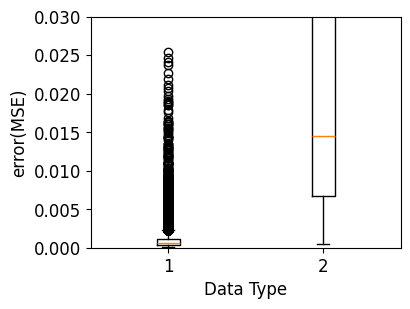

In [10]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12
fig, ax = plt.subplots()
box = ax.boxplot([normal_mse, abnormal_mse])
ax.set_ylim(0, 0.03)
ax.set_xlabel('Data Type')
ax.set_ylabel('error(MSE)')

whiskers = [item.get_ydata() for item in box['whiskers']]
medians = [item.get_ydata() for item in box['medians']]

print('whiskers:', whiskers)
print('medians:', medians)

plt.show()

In [11]:
threshold = pd.Series(normal_mse).describe()['75%']
flag = []
for error in normal_mse + abnormal_mse:
    if error > threshold:
        flag.append(1)
    else:
        flag.append(0)
y_test = np.array(y_test)
flag = np.array(flag)

In [12]:
# Evaluate
precision = sklearn.metrics.precision_score(y_test, flag)
recall = sklearn.metrics.recall_score(y_test, flag)
f1score = sklearn.metrics.f1_score(y_test, flag)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1 Score: ', f1score)

Precision:  0.0013976631072846202
Recall:  0.2032520325203252
F1 Score:  0.00277623542476402
